In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [65]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
df_03_17=pd.read_csv('2003_2017_waste.csv')
df_18_20=pd.read_csv('2018_2020_waste.csv')
df_we=pd.read_csv('waste_energy_stat.csv')

# 1. Data Cleaning

There are some difference in columns' names between df_03_17 and df_18_20. So I tried to match both columns' names. And I found some outliers in data df_18_20, so I changed them to the numbers which seem to be appropriate.

Next, I made one date frame which merged df_03_17 with df_18_20.

And the values of 'waste_type' have lots of different names which are actually same type. So I tried to match them into same types.

## 1) Data Cleaning

In [67]:
df_03_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   waste_type                   225 non-null    object 
 1   waste_disposed_of_tonne      225 non-null    int64  
 2   total_waste_recycled_tonne   225 non-null    float64
 3   total_waste_generated_tonne  225 non-null    int64  
 4   recycling_rate               225 non-null    float64
 5   year                         225 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 10.7+ KB


In [68]:
df_03_17.head()

,waste_type,waste_disposed_of_tonne,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year
0,Food,679900,111100.0,791000,0.14,2016
1,Paper/Cardboard,576000,607100.0,1183100,0.51,2016
2,Plastics,762700,59500.0,822200,0.07,2016
3,C&D,9700,1585700.0,1595400,0.99,2016
4,Horticultural waste,111500,209000.0,320500,0.65,2016


In [69]:
df_18_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Waste Type                     45 non-null     object
 1   Total Generated ('000 tonnes)  45 non-null     int64 
 2   Total Recycled ('000 tonnes)   45 non-null     int64 
 3   Year                           45 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ KB


In [70]:
df_18_20.head()

,Waste Type,Total Generated ('000 tonnes),Total Recycled ('000 tonnes),Year
0,Construction& Demolition,1624,1618,2018
1,Ferrous Metal,1269,126,2018
2,Paper/Cardboard,1054,586,2018
3,Plastics,949,41,2018
4,Food,763,126,2018


In [71]:
df_we.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column                                                                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                                                                               --------------  ----- 
 0   The table gives the amount of energy saved in kilowatt hour (kWh) and the amount of crude oil (barrels) by recycling 1 metric tonne (1000 kilogram)  per waste type  4 non-null      object
 1   Unnamed: 1                                                                                                                                                           3 non-null      object
 2   Unnamed: 2                                                                                                                 

In [72]:
df_we

,The table gives the amount of energy saved in kilowatt hour (kWh) and the amount of crude oil (barrels) by recycling 1 metric tonne (1000 kilogram) per waste type,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,1 barrel oil is approximately 159 litres of oil,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,material,Plastic,Glass,Ferrous Metal,Non-Ferrous Metal,Paper
3,energy_saved,5774 Kwh,42 Kwh,642 Kwh,14000 Kwh,4100 kWh
4,crude_oil saved,16 barrels,0.12 barrels,1.8 barrels,40 barrels,11 barrels


In [73]:
df_18_20 = df_18_20.rename(columns={'Waste Type':'waste_type', "Total Generated ('000 tonnes)":'total_waste_generated_tonne',
                              "Total Recycled ('000 tonnes)":'total_waste_recycled_tonne','Year':'year'})

In [74]:
df_18_20.head()

,waste_type,total_waste_generated_tonne,total_waste_recycled_tonne,year
0,Construction& Demolition,1624,1618,2018
1,Ferrous Metal,1269,126,2018
2,Paper/Cardboard,1054,586,2018
3,Plastics,949,41,2018
4,Food,763,126,2018


In [75]:
df_18_20.iloc[19,1]=744
df_18_20.iloc[1,2]=1260

## 2) Data Merging

In [76]:
df_18_20['total_waste_generated_tonne']=df_18_20['total_waste_generated_tonne']*1000
df_18_20['total_waste_recycled_tonne']=df_18_20['total_waste_recycled_tonne']*1000
df_18_20['recycling_rate']=df_18_20['total_waste_recycled_tonne']/df_18_20['total_waste_generated_tonne']

In [77]:
df_18_20['recycling_rate']=df_18_20['recycling_rate'].round(2)

In [78]:
df_18_20.head()

,waste_type,total_waste_generated_tonne,total_waste_recycled_tonne,year,recycling_rate
0,Construction& Demolition,1624000,1618000,2018,1.00
1,Ferrous Metal,1269000,1260000,2018,0.99
2,Paper/Cardboard,1054000,586000,2018,0.56
3,Plastics,949000,41000,2018,0.04
4,Food,763000,126000,2018,0.17


In [79]:
df_18_20 = df_18_20.reindex(columns=['waste_type','total_waste_recycled_tonne','total_waste_generated_tonne','recycling_rate','year'])

In [80]:
df_18_20.head()

,waste_type,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year
0,Construction& Demolition,1618000,1624000,1.00,2018
1,Ferrous Metal,1260000,1269000,0.99,2018
2,Paper/Cardboard,586000,1054000,0.56,2018
3,Plastics,41000,949000,0.04,2018
4,Food,126000,763000,0.17,2018


In [81]:
df_03_17=df_03_17.drop('waste_disposed_of_tonne',axis=1)

In [82]:
df_03_17.head()

,waste_type,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year
0,Food,111100.0,791000,0.14,2016
1,Paper/Cardboard,607100.0,1183100,0.51,2016
2,Plastics,59500.0,822200,0.07,2016
3,C&D,1585700.0,1595400,0.99,2016
4,Horticultural waste,209000.0,320500,0.65,2016


In [83]:
df=pd.concat([df_03_17, df_18_20])

## 3) The value cleaning of column 'waste_type'

In [84]:
df['waste_type'].unique()

array(['Food', 'Paper/Cardboard', 'Plastics', 'C&D',
       'Horticultural waste', 'Wood', 'Ferrous metal',
       'Non-ferrous metal', 'Used slag', 'Ash & Sludge', 'Glass',
       'Textile/Leather', 'Scrap tyres',
       'Others (stones, ceramics & rubber etc.)', 'Total',
       'Others (stones, ceramics & rubber etc)', 'Food waste',
       'Construction Debris', 'Wood/Timber', 'Horticultural Waste',
       'Ferrous Metal', 'Non-ferrous Metals', 'Used Slag', 'Sludge',
       'Scrap Tyres', 'Ferrous Metals', 'Others', 'Construction debris',
       'Non-ferrous metals', 'Ash and sludge', 'Plastic',
       'Others (stones, ceramic, rubber, etc.)',
       'Construction& Demolition', 'Horticultural', 'Non-Ferrous Metal',
       'Others (stones, ceramic, rubber, ect)', 'Overall',
       'Construction & Demolition', 'Ash & sludge',
       'Others (stones, ceramics, etc.)'], dtype=object)

In [85]:
df['waste_type']=df['waste_type'].str.lower()

In [86]:
df['waste_type'].value_counts()

used slag                                  18
glass                                      18
textile/leather                            18
scrap tyres                                18
paper/cardboard                            18
plastics                                   17
horticultural waste                        15
total                                      15
ferrous metal                              14
others (stones, ceramics & rubber etc)     12
non-ferrous metals                         12
construction debris                        12
food waste                                 11
sludge                                     11
wood/timber                                11
food                                        7
wood                                        7
ash & sludge                                6
non-ferrous metal                           6
ferrous metals                              4
c&d                                         3
horticultural                     

In [87]:
df=df.replace('plastic','plastics') 
df=df.replace('overall','total')
df=df.replace('horticultural','horticultural waste')
df=df.replace('ferrous metal','ferrous metals')
df=df.replace('non-ferrous metal','non-ferrous metals')
df=df.replace(['construction& demolition','construction & demolition','c&d'],'construction debris')
df=df.replace(['others (stones, ceramic, rubber, ect)','others (stones, ceramics, etc.)','others',
               'others (stones, ceramic, rubber, etc.)','others (stones, ceramics & rubber etc.)'],'others (stones, ceramics & rubber etc)')
df=df.replace('food waste','food')
df=df.replace('wood','wood/timber')
df=df.replace(['ash & sludge','sludge'],'ash and sludge')

In [88]:
df['waste_type'].value_counts()

food                                      18
paper/cardboard                           18
plastics                                  18
construction debris                       18
horticultural waste                       18
wood/timber                               18
ferrous metals                            18
non-ferrous metals                        18
used slag                                 18
ash and sludge                            18
glass                                     18
textile/leather                           18
scrap tyres                               18
others (stones, ceramics & rubber etc)    18
total                                     18
Name: waste_type, dtype: int64

In [89]:
df.to_csv('2003_2020_waste.csv', index=False)
df_we.to_csv('waste_energy.csv', index=False)

<hr style="border: 1px solid red;">

# 2. Visualization

First, I tried to understand time series trend of 'total waste generated', 'total recycle generated' and 'recycling rate'and the portion of 'total_waste_generated_tonne' by 'waste_type'.

Next, I tried to understand the amount and time series trend of 'energy_saving_amount' and 'oil_saving_amount' by 'waste_type'.

Lastly, I also tried to understand time series trend of 'waste generated', 'recycle generated' and 'recycling rate' by some 'waste_type' to get some insight.

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime

In [91]:
df_total=df[df['waste_type']=='total']

In [92]:
df_total= df_total.sort_values('year')

In [93]:
df_total.head()

,waste_type,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year
209,total,2223200.0,4728200,0.47,2003
194,total,2307100.0,4789700,0.48,2004
179,total,2469400.0,5018200,0.49,2005
164,total,2656900.0,5220500,0.51,2006
149,total,3034800.0,5600800,0.54,2007


In [94]:
df_total.dtypes

waste_type                      object
total_waste_recycled_tonne     float64
total_waste_generated_tonne      int64
recycling_rate                 float64
year                             int64
dtype: object

1) Time series trend of 'total waste generated', 'total recycle generated' and 'recycling rate'.

In [95]:
fig = go.Figure()

fig= make_subplots(specs=[[{'secondary_y': True}]])

fig.add_trace(
    go.Bar(
        x=df_total['year'],
        y=df_total['total_waste_generated_tonne'],
        name='Waste Generated',
    )
)
fig.add_trace(
    go.Bar(
        x=df_total['year'],
        y=df_total['total_waste_recycled_tonne'],
        name='Waste Recycled',
    )
)

fig.add_trace(
    go.Line(
        x=df_total['year'],
        y=df_total['recycling_rate'],
        name='Recycling Rate',
    ),
    secondary_y=True
)

fig.show()


2) The portion of 'total_waste_generated_tonne' by 'waste_type'.

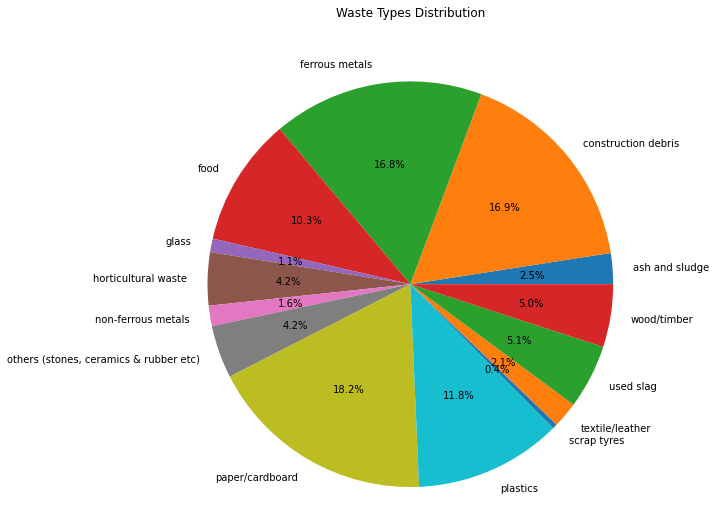

In [96]:
import matplotlib.pyplot as plt

# Assuming 'waste_type' is the column containing waste type names and 'total_waste_generated_tonne' is the column containing the corresponding waste amounts.

df1 = df[df['waste_type'] != 'total']
grouped_data = df1.groupby('waste_type')['total_waste_generated_tonne'].sum()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%')
plt.title("Waste Types Distribution", loc="center", y=1.1)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

3) Calcurate the amount of 'energy_saving_amount' and 'oil_saving_amount'.

In [97]:
df_energy_save=df[df['waste_type'].isin(['plastics','glass','ferrous metals','non-ferrous metals','paper/cardboard'])]

In [98]:
df_energy_save.head()

,waste_type,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year
1,paper/cardboard,607100.0,1183100,0.51,2016
2,plastics,59500.0,822200,0.07,2016
6,ferrous metals,1351500.0,1357500,0.99,2016
7,non-ferrous metals,95900.0,97200,0.99,2016
10,glass,14700.0,72300,0.20,2016


In [99]:
def energy_save(ex):
    if ex=='paper/cardboard':
        return 4100
    elif ex=='plastics':
        return 5774
    elif ex=='ferrous metals':
        return 642
    elif ex=='non-ferrous metals':
        return 14000
    else:
        return 42

In [100]:
def oil_saving(ex):
    if ex=='paper/cardboard':
        return 11*159
    elif ex=='plastics':
        return 16*159
    elif ex=='ferrous metals':
        return 1.8*159
    elif ex=='non-ferrous metals':
        return 40*159
    else:
        return 0.12*159

In [101]:
df_energy_save['energy_saving']=df_energy_save['waste_type'].apply(energy_save)
df_energy_save['oil_saving']=df_energy_save['waste_type'].apply(oil_saving)
df_energy_save['energy_saving_amount']=df_energy_save['total_waste_recycled_tonne']*df_energy_save['energy_saving']
df_energy_save['oil_saving_amount']=df_energy_save['total_waste_recycled_tonne']*df_energy_save['oil_saving']

In [102]:
df_energy_save.head()

,waste_type,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year,energy_saving,oil_saving,energy_saving_amount,oil_saving_amount
1,paper/cardboard,607100.0,1183100,0.51,2016,4100,1749.00,2.489110e+09,1.061818e+09
2,plastics,59500.0,822200,0.07,2016,5774,2544.00,3.435530e+08,1.513680e+08
6,ferrous metals,1351500.0,1357500,0.99,2016,642,286.20,8.676630e+08,3.867993e+08
7,non-ferrous metals,95900.0,97200,0.99,2016,14000,6360.00,1.342600e+09,6.099240e+08
10,glass,14700.0,72300,0.20,2016,42,19.08,6.174000e+05,2.804760e+05


4) The time series trend of 'energy_saving_amount' and 'oil_saving_amount' by 'waste_type'.

In [103]:
fig = px.bar(df_energy_save, x="year", y="energy_saving_amount", color="waste_type", title="energy_saving_amount")
fig.show()

In [104]:
fig = px.bar(df_energy_save, x="year", y="oil_saving_amount", color="waste_type", title="oil_saving_amount")
fig.show()

In [113]:
# Calculate average oil saving amount for each waste type
average_oil_saving = df_energy_save.groupby('waste_type')['oil_saving_amount'].mean().reset_index()

# Plot the bar graph
fig = px.bar(average_oil_saving, x="waste_type", y="oil_saving_amount", color="waste_type", title="Average Oil Saving Amount by Waste Type")
fig.show()

In [115]:
# Group by 'waste_type' and calculate the average energy saving amount
average_energy_saving = df_energy_save.groupby('waste_type')['energy_saving_amount'].mean().reset_index()

# Plot the bar graph
fig = px.bar(average_energy_saving, x="waste_type", y="energy_saving_amount", color="waste_type", title="Average Energy Saving Amount by Waste Type")
fig.show()

Paper/Cardboard and non-ferrous metals are larger impact to energy saving because their amount of energy saved in kilowatt hour (kWh) and their amount of crude oil (barrels) by recycling 1 metric tonne (1000 kilogram) per waste type are large.

5) The time series trend of 'waste generated', 'recycle generated' and 'recycling rate' by some 'waste_types'.

In [105]:
df_metal=df[df['waste_type']=='ferrous metals'].sort_values('year')
df_const=df[df['waste_type']=='construction debris'].sort_values('year')
df_food=df[df['waste_type']=='food'].sort_values('year')
df_paper=df[df['waste_type']=='paper/cardboard'].sort_values('year')
df_plastic=df[df['waste_type']=='plastics'].sort_values('year')
df_nometal=df[df['waste_type']=='non-ferrous metals'].sort_values('year')
df_glass=df[df['waste_type']=='glass'].sort_values('year')

In [106]:

fig = go.Figure()

fig= make_subplots(specs=[[{'secondary_y': True}]])

fig.add_trace(
    go.Bar(
        x=df_metal['year'],
        y=df_metal['total_waste_generated_tonne'],
        name='Metal Waste Generated',
    )
)
fig.add_trace(
    go.Bar(
        x=df_metal['year'],
        y=df_metal['total_waste_recycled_tonne'],
        name='Metal Waste Recycled',
    )
)

fig.add_trace(
    go.Line(
        x=df_metal['year'],
        y=df_metal['recycling_rate'],
        name='Metal Recycling Rate',
    ),
    secondary_y=True
)

fig.show()

In [107]:
fig = go.Figure()

fig= make_subplots(specs=[[{'secondary_y': True}]])

fig.add_trace(
    go.Bar(
        x=df_const['year'],
        y=df_const['total_waste_generated_tonne'],
        name='Construction Waste Generated',
    )
)
fig.add_trace(
    go.Bar(
        x=df_const['year'],
        y=df_const['total_waste_recycled_tonne'],
        name='Construction Waste Recycled',
    )
)

fig.add_trace(
    go.Line(
        x=df_const['year'],
        y=df_const['recycling_rate'],
        name='Construction Recycling Rate',
    ),
    secondary_y=True
)

fig.show()

In [108]:

fig = go.Figure()

fig= make_subplots(specs=[[{'secondary_y': True}]])

fig.add_trace(
    go.Bar(
        x=df_food['year'],
        y=df_food['total_waste_generated_tonne'],
        name='Food Waste Generated',
    )
)
fig.add_trace(
    go.Bar(
        x=df_food['year'],
        y=df_food['total_waste_recycled_tonne'],
        name='Food Waste Recycled',
    )
)

fig.add_trace(
    go.Line(
        x=df_food['year'],
        y=df_food['recycling_rate'],
        name='Food Recycling Rate',
    ),
    secondary_y=True
)

fig.show()

In [109]:
fig = go.Figure()

fig= make_subplots(specs=[[{'secondary_y': True}]])

fig.add_trace(
    go.Bar(
        x=df_paper['year'],
        y=df_paper['total_waste_generated_tonne'],
        name='Paper Waste Generated',
    )
)
fig.add_trace(
    go.Bar(
        x=df_paper['year'],
        y=df_paper['total_waste_recycled_tonne'],
        name='Paper Waste Recycled',
    )
)

fig.add_trace(
    go.Line(
        x=df_paper['year'],
        y=df_paper['recycling_rate'],
        name='Paper Recycling Rate',
    ),
    secondary_y=True
)

fig.show()

In [110]:

fig = go.Figure()

fig= make_subplots(specs=[[{'secondary_y': True}]])

fig.add_trace(
    go.Bar(
        x=df_plastic['year'],
        y=df_plastic['total_waste_generated_tonne'],
        name='Plastic Waste Generated',
    )
)
fig.add_trace(
    go.Bar(
        x=df_plastic['year'],
        y=df_plastic['total_waste_recycled_tonne'],
        name='Plastic Waste Recycled',
    )
)

fig.add_trace(
    go.Line(
        x=df_plastic['year'],
        y=df_plastic['recycling_rate'],
        name='Plastic Recycling Rate',
    ),
    secondary_y=True
)

fig.show()

In [111]:

fig = go.Figure()

fig= make_subplots(specs=[[{'secondary_y': True}]])

fig.add_trace(
    go.Bar(
        x=df_nometal['year'],
        y=df_nometal['total_waste_generated_tonne'],
        name='Nonmetal Waste Generated',
    )
)
fig.add_trace(
    go.Bar(
        x=df_nometal['year'],
        y=df_nometal['total_waste_recycled_tonne'],
        name='Nonmetal Waste Recycled',
    )
)

fig.add_trace(
    go.Line(
        x=df_nometal['year'],
        y=df_nometal['recycling_rate'],
        name='Nonmetal Recycling Rate',
    ),
    secondary_y=True
)

fig.show()

In [112]:
fig = go.Figure()

fig= make_subplots(specs=[[{'secondary_y': True}]])

fig.add_trace(
    go.Bar(
        x=df_glass['year'],
        y=df_glass['total_waste_generated_tonne'],
        name='Glass Waste Generated',
    )
)
fig.add_trace(
    go.Bar(
        x=df_glass['year'],
        y=df_glass['total_waste_recycled_tonne'],
        name='Glass Waste Recycled',
    )
)

fig.add_trace(
    go.Line(
        x=df_glass['year'],
        y=df_glass['recycling_rate'],
        name='Glass Recycling Rate',
    ),
    secondary_y=True
)

fig.show()

<hr style="border: 1px solid red;">

# 3. The insight

1) Paper/Cardboard and non-ferrous metals are larger impact to energy saving because their amount of energy saved in kilowatt hour (kWh) and their amount of crude oil (barrels) by recycling 1 metric tonne (1000 kilogram) per waste type are large.

2) Plastic has also the largest amount of energy saved in kilowatt hour (kWh) and larger amount of crude oil (barrels) by recycling 1 metric tonne (1000 kilogram) per waste type. But its recycle rate is very low, so the impact to energy save is quiet low. One of the important action which we should consider is how we can improve the tech to raise the recycle rate of plastics.

3) Other problem is food waste globally. In Singapore, it seems same as other advanced countries. This time we do not have any data about their amount of energy saved in kilowatt hour (kWh) and their amount of crude oil (barrels) by recycling 1 metric tonne (1000 kilogram) per waste type. But if we can improve its recycle rate and understand data about energy save and crude oil by recycling, we may be improve more totally.